In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
# This is the data file with diagnosis info (anonymized)
diagnosis = pd.read_csv('data/ppmi-2018-08-28/Prodromal_Diagnostic_Questionnaire.csv').set_index('PATNO')
diagnosis.head()

,REC_ID,F_STATUS,EVENT_ID,PAG_NAME,PRIMDIAG,OTHNEURO,PSLVL2,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
PATNO,,,,,,,,,,,
10362,408770801,V,SC,PRODDIAG,17,NaN,4,08/2013,2013-08-23 11:37:07.0,NaN,08/2013
10405,605736601,V,SC,PRODDIAG,17,NaN,5,12/2016,2016-12-06 12:45:38.0,NaN,12/2016
10496,410987801,V,SC,PRODDIAG,23,NaN,5,09/2013,2013-09-05 11:40:13.0,NaN,09/2013
10606,409586301,S,SC,PRODDIAG,17,NaN,4,09/2013,2015-06-26 08:19:21.0,NaN,03/2015
10662,448326801,V,SC,PRODDIAG,17,NaN,5,07/2014,2014-07-16 08:08:30.0,NaN,07/2014


In [3]:
# This is the data file with diagnosis codes (anonymized)
codes = pd.read_csv('data/ppmi-2018-08-28/Code_List.csv')
codes.head()

,PAG_NAME,ITM_NAME,CDL_NAME,CODE,DECODE,LAST_UPDATE
0,AE,AEFLUP,YN,0,No,2010-12-06 07:13:10.0
1,AE,AEFLUP,YN,1,Yes,2010-12-06 07:13:10.0
2,AE,AEOUTCOM,AEOUTCOM,1,recovered,2010-12-06 07:13:10.0
3,AE,AEOUTCOM,AEOUTCOM,2,under treatment / observation,2010-12-06 07:13:10.0
4,AE,AEOUTCOM,AEOUTCOM,3,change in AE characteristic,2010-12-06 07:13:10.0


In [4]:
# Find all primary diagnosis codes and remove duplicates
codes = codes[codes['ITM_NAME']=='PRIMDIAG'][['CODE','DECODE']].groupby('CODE').first()
codes

,DECODE
CODE,
01,Idiopathic PD
02,Alzheimer's disease
03,Chromosome-17 frontotemporal dementia
04,Corticobasal degeneration
05,Dementia with Lewy bodies
06,Dopa-responsive dystonia
07,Essential tremor
08,Hemiparkinson/hemiatrophy syndrome
09,Juv. autosomal recessive parkinsonism


In [5]:
# Replace the numeric code in the diagnosis table with the text description above.
diagnosis['PRIMDIAG'] = diagnosis['PRIMDIAG'].map(lambda x:codes.loc['%.2d'%x,'DECODE'])

In [6]:
# This is the data file with smell test info
upsit = pd.read_csv('data/ppmi-2018-08-28/Olfactory_UPSIT.csv').set_index('SUBJECT_ID')
upsit.head()

,PROTOCOL_ID,COMPLT_DATE,SCENT_10_RESPONSE,SCENT_09_RESPONSE,SCENT_08_RESPONSE,SCENT_07_RESPONSE,SCENT_06_RESPONSE,SCENT_05_RESPONSE,SCENT_04_RESPONSE,SCENT_03_RESPONSE,...,SCENT_38_CORRECT,SCENT_37_CORRECT,SCENT_36_CORRECT,SCENT_35_CORRECT,SCENT_34_CORRECT,SCENT_33_CORRECT,SCENT_32_CORRECT,SCENT_31_CORRECT,TOTAL_CORRECT,UPSIIT_PRCNTGE
SUBJECT_ID,,,,,,,,,,,,,,,,,,,,,
90000,P-PPMI Cohort,04/2013,2,3,2,1,2,3,4,4,...,1,1,0,1,1,1,1,1,38,98
90001,P-PPMI Cohort,04/2013,2,3,2,1,2,3,4,4,...,1,0,1,1,0,1,0,1,30,36
90002,P-PPMI Cohort,03/2013,2,3,2,1,2,1,4,4,...,1,1,1,1,0,1,1,1,28,36
90003,P-PPMI Cohort,04/2013,3,1,1,4,2,4,3,2,...,0,0,0,0,0,0,0,0,8,0
90004,P-PPMI Cohort,04/2013,1,3,2,1,2,3,4,4,...,1,1,0,1,1,1,0,1,32,75


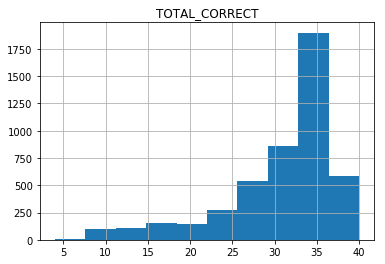

In [7]:
# Here is a histogram of total correct out of 40 for all of the subjects
upsit.hist('TOTAL_CORRECT');

In [8]:
# Merge the two tables using an inner join (only keep indices i.e. patient IDs that exist in both tables)
joined = upsit.join(diagnosis, how='inner')
print('There are %d patients common to both tables.' % joined.shape[0])

There are 407 patients common to both tables.


In [9]:
# Here is a break-down of the patient diagnoses (for all patients we have UPSIT data and diagnoses for).
joined['PRIMDIAG'].value_counts()

Prodromal non-motor PD                      215
No PD nor other neurological disorder       119
Prodromal motor PD                           35
Idiopathic PD                                33
Essential tremor                              2
Other neurological disorder(s) (specify)      2
Progressive supranuclear palsy                1
Name: PRIMDIAG, dtype: int64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


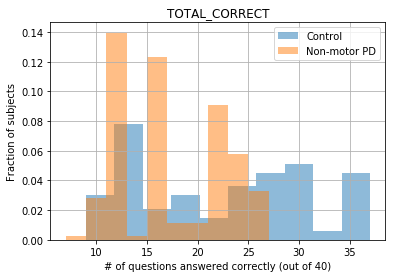

In [10]:
# Here are histograms of (non-motor) PD and controls.  
# You can see that the distributions overlap, but PD usually has worse smell.  
pro_nm_pd = joined[joined['PRIMDIAG']=='Prodromal non-motor PD']
control = joined[joined['PRIMDIAG']=='No PD nor other neurological disorder']
ax = control.hist('TOTAL_CORRECT', normed=True, alpha=0.5, label='Control');
pro_nm_pd.hist('TOTAL_CORRECT', ax=ax, normed=True, alpha=0.5, label='Non-motor PD');
plt.legend()
plt.xlabel('# of questions answered correctly (out of 40)')
plt.ylabel('Fraction of subjects');

In [11]:
# Here are all the columns in the joined table.  
# You can see that there are two columns for each of the 40 questions, one for what the response was, 
# and one for whether it is correct.  
# We should plan to try to predict the eventual diagnosis from this information.
# Eventually we want to incorporate time, so that we can predict future (years later) diagnoses
# from current UPSIT tests.  
list(joined)

['PROTOCOL_ID',
 'COMPLT_DATE',
 'SCENT_10_RESPONSE',
 'SCENT_09_RESPONSE',
 'SCENT_08_RESPONSE',
 'SCENT_07_RESPONSE',
 'SCENT_06_RESPONSE',
 'SCENT_05_RESPONSE',
 'SCENT_04_RESPONSE',
 'SCENT_03_RESPONSE',
 'SCENT_02_RESPONSE',
 'SCENT_01_RESPONSE',
 'SCENT_20_RESPONSE',
 'SCENT_19_RESPONSE',
 'SCENT_18_RESPONSE',
 'SCENT_17_RESPONSE',
 'SCENT_16_RESPONSE',
 'SCENT_15_RESPONSE',
 'SCENT_14_RESPONSE',
 'SCENT_13_RESPONSE',
 'SCENT_12_RESPONSE',
 'SCENT_11_RESPONSE',
 'SCENT_30_RESPONSE',
 'SCENT_29_RESPONSE',
 'SCENT_28_RESPONSE',
 'SCENT_27_RESPONSE',
 'SCENT_26_RESPONSE',
 'SCENT_25_RESPONSE',
 'SCENT_24_RESPONSE',
 'SCENT_23_RESPONSE',
 'SCENT_22_RESPONSE',
 'SCENT_21_RESPONSE',
 'SCENT_40_RESPONSE',
 'SCENT_39_RESPONSE',
 'SCENT_38_RESPONSE',
 'SCENT_37_RESPONSE',
 'SCENT_36_RESPONSE',
 'SCENT_35_RESPONSE',
 'SCENT_34_RESPONSE',
 'SCENT_33_RESPONSE',
 'SCENT_32_RESPONSE',
 'SCENT_31_RESPONSE',
 'SCENT_10_CORRECT',
 'SCENT_09_CORRECT',
 'SCENT_08_CORRECT',
 'SCENT_07_CORRECT',
 'SC

# Prepare Data

In [12]:
joined['PRIMDIAG'].unique()

array(['No PD nor other neurological disorder', 'Prodromal non-motor PD',
       'Essential tremor', 'Prodromal motor PD', 'Idiopathic PD',
       'Other neurological disorder(s) (specify)',
       'Progressive supranuclear palsy'], dtype=object)

In [13]:
joined.head()

# Find what columns we are interested in
start = joined.columns.get_loc('SCENT_10_CORRECT')
end = joined.columns.get_loc('SCENT_31_CORRECT')

print(start)
print(end)

# Right after this, I split the data into two data frames. 
# It would have been much easier to do all of my column name prep first and
# then split the data frames instead of having to do every operation twice.
# I am going to do that now because it will also make my data more ready for
# classification

# Scratch that. I started doing it and realized I would no longer have the column 
# that tells if the subject was control or got PD. Thank goodness for version control!

42
81


In [14]:
# Make data frames with only those who have PD or do not have PD
NoPD = joined[joined['PRIMDIAG']=='No PD nor other neurological disorder']
PD = joined[joined['PRIMDIAG']=='Prodromal non-motor PD']

#Display all unique primary diagnoses to validate
print(PD['PRIMDIAG'].unique())
print(NoPD['PRIMDIAG'].unique())

['Prodromal non-motor PD']
['No PD nor other neurological disorder']


In [15]:
# Only include columns of interest
correctNoPD = NoPD.iloc[ : , start : end+1]
correctPD = PD.iloc[ : , start:end+1]
correctNoPD.head()

# Fix the headers first, then add the totals row

,SCENT_10_CORRECT,SCENT_09_CORRECT,SCENT_08_CORRECT,SCENT_07_CORRECT,SCENT_06_CORRECT,SCENT_05_CORRECT,SCENT_04_CORRECT,SCENT_03_CORRECT,SCENT_02_CORRECT,SCENT_01_CORRECT,...,SCENT_40_CORRECT,SCENT_39_CORRECT,SCENT_38_CORRECT,SCENT_37_CORRECT,SCENT_36_CORRECT,SCENT_35_CORRECT,SCENT_34_CORRECT,SCENT_33_CORRECT,SCENT_32_CORRECT,SCENT_31_CORRECT
10362,1,0,1,0,1,0,0,0,0,0,...,1,1,1,1,0,1,0,1,0,1
10405,0,0,1,0,0,0,0,0,0,0,...,1,1,1,0,0,1,1,0,1,0
10606,0,1,1,1,0,1,0,1,1,0,...,1,1,0,0,1,0,1,0,0,1
10662,0,1,1,1,1,1,1,0,1,0,...,0,1,1,1,0,0,0,0,1,0
10663,1,0,1,1,0,1,1,1,0,0,...,0,1,1,1,1,0,1,1,1,1


In [16]:
# Make the column names just the number to make plot easier to read

headersNoPD = (correctNoPD.columns).tolist()
newHeadersNoPD = [d[6:-8] for d in headersNoPD]
print(newHeadersNoPD)

headersPD = (correctPD.columns).tolist()
newHeadersPD = [d[6:-8] for d in headersPD]



# Make the names ints so sorting is better

finalHeadersNoPD = [int(float(s)) for s in newHeadersNoPD]
correctNoPD.columns = finalHeadersNoPD

finalHeadersPD = [int(float(s)) for s in newHeadersPD]
correctPD.columns = finalHeadersPD

correctNoPD.tail()


['10', '09', '08', '07', '06', '05', '04', '03', '02', '01', '20', '19', '18', '17', '16', '15', '14', '13', '12', '11', '30', '29', '28', '27', '26', '25', '24', '23', '22', '21', '40', '39', '38', '37', '36', '35', '34', '33', '32', '31']


,10,9,8,7,6,5,4,3,2,1,...,40,39,38,37,36,35,34,33,32,31
91249,0,1,1,0,1,1,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
91548,1,1,1,1,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
92516,0,1,1,0,1,1,0,1,1,0,...,1,0,0,1,0,0,1,1,0,1
92560,1,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,0
92834,0,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0


In [17]:
# Sort columns by Question Number
correctNoPD = correctNoPD.reindex(sorted(correctNoPD.columns), axis=1)
correctPD = correctPD.reindex(sorted(correctPD.columns), axis=1)
correctNoPD.tail()

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
91249,0,1,1,0,1,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
91548,0,1,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,1,0,1,0
92516,0,1,1,0,1,1,0,1,1,0,...,1,0,1,1,0,0,1,0,0,1
92560,0,1,1,0,0,0,1,1,0,1,...,0,0,1,1,0,0,0,0,0,0
92834,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [18]:
# Add a totals row to the new data frames
totalsNoPD = correctNoPD.append(correctNoPD.sum(numeric_only=True), ignore_index=True)
totalsPD = correctPD.append(correctPD.sum(numeric_only=True), ignore_index=True)
totalsNoPD.tail()

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
115,0,1,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,1,0,1,0
116,0,1,1,0,1,1,0,1,1,0,...,1,0,1,1,0,0,1,0,0,1
117,0,1,1,0,0,0,1,1,0,1,...,0,0,1,1,0,0,0,0,0,0
118,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
119,35,89,76,77,73,59,65,84,87,55,...,54,48,86,74,75,27,89,76,63,88


# Bar Graph

In [19]:
# Extract only the total values from each column and each data frame
bar1 = totalsNoPD.values[-1].tolist()
bar2 = totalsPD.values[-1].tolist()
print(bar1)

[35, 89, 76, 77, 73, 59, 65, 84, 87, 55, 87, 74, 62, 41, 55, 75, 81, 58, 73, 63, 83, 25, 75, 69, 45, 49, 38, 60, 82, 76, 54, 48, 86, 74, 75, 27, 89, 76, 63, 88]


In [20]:
# Find the total number of subjects in each group
print(totalsNoPD.shape)
print(totalsPD.shape)

(120, 40)
(216, 40)


In [21]:
# Divide by total number of subjects to get ratio
bar1frac = [x / 120 for x in bar1]
bar2frac = [x / 216 for x in bar2]

In [22]:
#Find the standard error of the means using scipy.sem()
xerr = []
for j in correctNoPD:
    xerr.append(stats.sem(correctNoPD[j]))
    
yerr = []
for k in correctPD:
    yerr.append(stats.sem(correctPD[k]))

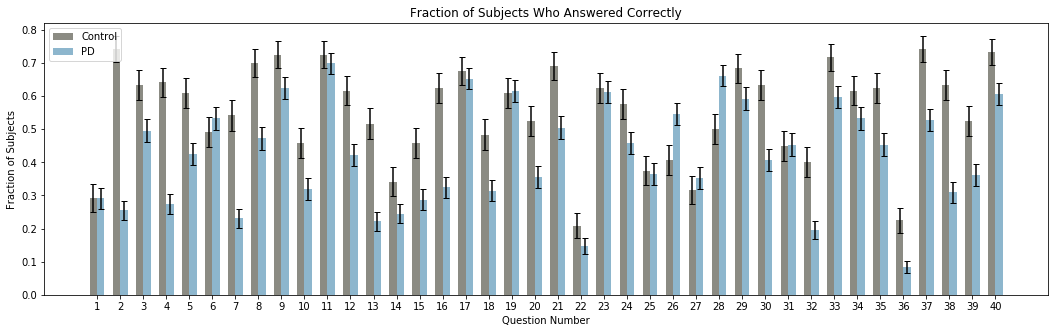

In [23]:
# The plot shows that only a handful of questions were answered correctly more often by those with PD
# Maybe we can see if excluding these questions creates a better classifier
# Also, on some questions, both groups did poorly
# On other questions, there is a significant gap between the fraction of correctness for each group

fig, ax = plt.subplots(figsize=(18, 5))

# Create the scatter plot

# Arrange the groups along the x axis
N = len(totalsPD.columns)
ind = np.arange(N)

# Choose the width of the bars
width = .32       

# Plot the bar plot with the errors
p1 = plt.bar(ind, bar1frac, width, yerr=xerr, align='center', color='#8B8B83', capsize=3, ecolor='k')
p2 = plt.bar(ind + width, bar2frac, width, yerr=yerr, align='center', color='#8DB6CD', capsize=3, ecolor='k')

# Format the plot
ax.set_title('Fraction of Subjects Who Answered Correctly')
plt.ylabel('Fraction of Subjects')
plt.xlabel('Question Number')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(totalsPD.columns)

ax.legend((p1[0], p2[0]), ('Control', 'PD'), loc=2)

plt.show()




# Scatter Plot

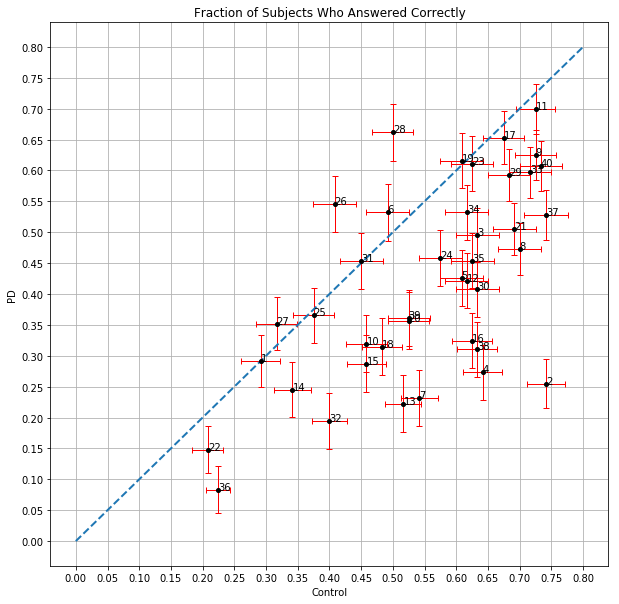

In [24]:
# I do like this visualization a lot better
# It is much more clear that the control group produced more correct answers
# It also emphasizes those questions that the PD group did better on, or the
# ones that both groups performed similarly. It is a lot easier than scanning through the bar graph.
# It also summarizes which questions seemed to be harder or easier overall, as well as the questions
# with the greatest difference in correct response (like question 2 in the lower right corner)
# Also, question 20 and 39 had almost the same results

# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 10))


x = bar1frac # Control
y = bar2frac # PD
n = totalsPD.columns # Question Number

# Plot a scatterplot with error bars
ax.errorbar(x, y, xerr, yerr, fmt='ko', ecolor='red', capsize=3, ms=4, elinewidth=1)

# Plot a dotted line where Control and PD are equal
ax.plot(np.linspace(0,.8), np.linspace(0,.8) , linestyle='dashed', linewidth=2)

# Label each point with the corresponding Question Number
# I think there is a package I can use to make the annotations not overlap if needed
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
    
# Label the graph
plt.xlabel('Control')
plt.ylabel('PD')
plt.title('Fraction of Subjects Who Answered Correctly')

# Make the axes have the same scale
plt.xticks(np.linspace(0,.8, num=17))
plt.yticks(np.linspace(0,.8, num=17))

plt.grid()
plt.show()

# Prepare Data for Classification

In [25]:
# Start classification

# Prepare data for classification techniques
# Use only columns that we are interested in

# I reuse similar steps as above, and I thought about changing the above code to fit both
# scenarios.
# I could use the previous data frames, remove the totals columns, and add a PRIMDIAG column
# the combine them, but I would rather just start fresh


# Find what columns we are interested in
start = joined.columns.get_loc('SCENT_10_CORRECT')
end = joined.columns.get_loc('SCENT_31_CORRECT')
print(start, end)

42 81


In [26]:
# Create new dataframe with only correct response columns
newJoined = joined.iloc[:, start:end + 1]
newJoined.head()

,SCENT_10_CORRECT,SCENT_09_CORRECT,SCENT_08_CORRECT,SCENT_07_CORRECT,SCENT_06_CORRECT,SCENT_05_CORRECT,SCENT_04_CORRECT,SCENT_03_CORRECT,SCENT_02_CORRECT,SCENT_01_CORRECT,...,SCENT_40_CORRECT,SCENT_39_CORRECT,SCENT_38_CORRECT,SCENT_37_CORRECT,SCENT_36_CORRECT,SCENT_35_CORRECT,SCENT_34_CORRECT,SCENT_33_CORRECT,SCENT_32_CORRECT,SCENT_31_CORRECT
10362,1,0,1,0,1,0,0,0,0,0,...,1,1,1,1,0,1,0,1,0,1
10405,0,0,1,0,0,0,0,0,0,0,...,1,1,1,0,0,1,1,0,1,0
10496,1,1,1,1,0,1,1,1,0,1,...,1,0,1,1,0,1,1,1,0,0
10606,0,1,1,1,0,1,0,1,1,0,...,1,1,0,0,1,0,1,0,0,1
10662,0,1,1,1,1,1,1,0,1,0,...,0,1,1,1,0,0,0,0,1,0


In [27]:
# Make the column names just the number to make plot easier to read

headersJ = (newJoined.columns).tolist()
newHeadersJ = [d[6:-8] for d in headersJ]
print(newHeadersJ)

['10', '09', '08', '07', '06', '05', '04', '03', '02', '01', '20', '19', '18', '17', '16', '15', '14', '13', '12', '11', '30', '29', '28', '27', '26', '25', '24', '23', '22', '21', '40', '39', '38', '37', '36', '35', '34', '33', '32', '31']


In [28]:
# Make the names ints so sorting is better
finalHeadersJ = [int(float(s)) for s in newHeadersJ]
newJoined.columns = finalHeadersJ
newJoined.head()

,10,9,8,7,6,5,4,3,2,1,...,40,39,38,37,36,35,34,33,32,31
10362,1,0,1,0,1,0,0,0,0,0,...,1,1,1,1,0,1,0,1,0,1
10405,0,0,1,0,0,0,0,0,0,0,...,1,1,1,0,0,1,1,0,1,0
10496,1,1,1,1,0,1,1,1,0,1,...,1,0,1,1,0,1,1,1,0,0
10606,0,1,1,1,0,1,0,1,1,0,...,1,1,0,0,1,0,1,0,0,1
10662,0,1,1,1,1,1,1,0,1,0,...,0,1,1,1,0,0,0,0,1,0


In [29]:
# Sort columns by Question Number
newJoined = newJoined.reindex(sorted(newJoined.columns), axis=1)
newJoined.head()

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
10362,0,0,0,0,0,1,0,1,0,1,...,1,0,1,0,1,0,1,1,1,1
10405,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,1,0,0,1,1,1
10496,1,0,1,1,1,0,1,1,1,1,...,0,0,1,1,1,0,1,1,0,1
10606,0,1,1,0,1,0,1,1,1,0,...,1,0,0,1,0,1,0,0,1,1
10662,0,1,0,1,1,1,1,1,1,0,...,0,1,0,0,0,0,1,1,1,0


In [30]:
# add on PRIMDIAG column
newJoined['PRIMDIAG'] = joined['PRIMDIAG']
newJoined.head()

,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,PRIMDIAG
10362,0,0,0,0,0,1,0,1,0,1,...,0,1,0,1,0,1,1,1,1,No PD nor other neurological disorder
10405,0,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,0,1,1,1,No PD nor other neurological disorder
10496,1,0,1,1,1,0,1,1,1,1,...,0,1,1,1,0,1,1,0,1,Prodromal non-motor PD
10606,0,1,1,0,1,0,1,1,1,0,...,0,0,1,0,1,0,0,1,1,No PD nor other neurological disorder
10662,0,1,0,1,1,1,1,1,1,0,...,1,0,0,0,0,1,1,1,0,No PD nor other neurological disorder


In [31]:
# Convert Joined data PRIMDIAG to binary. 0 for control, 1 for PD
newJoined['PRIMDIAG2'] = np.where(newJoined['PRIMDIAG'] == 'No PD nor other neurological disorder', '0', '1')
newJoined.tail()

,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,PRIMDIAG,PRIMDIAG2
92834,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,Prodromal non-motor PD,1
92834,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,Prodromal non-motor PD,1
92834,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,Prodromal non-motor PD,1
92834,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,No PD nor other neurological disorder,0
92834,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,Prodromal non-motor PD,1


In [32]:
# Drop the string version of PRIMDIAG
finalJoined = newJoined.drop('PRIMDIAG', 1)
finalJoined.head()

,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,PRIMDIAG2
10362,0,0,0,0,0,1,0,1,0,1,...,0,1,0,1,0,1,1,1,1,0
10405,0,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,0,1,1,1,0
10496,1,0,1,1,1,0,1,1,1,1,...,0,1,1,1,0,1,1,0,1,1
10606,0,1,1,0,1,0,1,1,1,0,...,0,0,1,0,1,0,0,1,1,0
10662,0,1,0,1,1,1,1,1,1,0,...,1,0,0,0,0,1,1,1,0,0


# Support Vector Machine

## Cross Validation

In [33]:
# Mean of the data = 0.7076167076167076
finalJoined['PRIMDIAG2'].astype(float).mean()

0.7076167076167076

In [34]:
# Split data into X and y
yList = finalJoined['PRIMDIAG2'].tolist()
yInts = [int(float(s)) for s in yList]
y = np.asarray(yInts)
final = finalJoined.drop('PRIMDIAG2', 1)
n = final.count
X = final.values

In [35]:
# Import cross validation method and scoring to tune hyperparameter C
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, matthews_corrcoef, make_scorer

matt_score = make_scorer(matthews_corrcoef)

### 1 Stratified K Fold

In [36]:
# Create many classifiers with different C values
clfs_SKF = []

#C_values = [0.01, 0.1, 0.2, 0.5, 1.0, 1.1, 1.2, 1.5, 2, 2.5, 5, 10]
#C_values = [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
#C_values = [0.45, 0.47, 0.49, 0.5, 0.51, 0.53, 0.55, 0.56, 0.57, 0.58, 0.59, .6]
C_vals_SKF = [0.5, 0.53, 0.54, 0.55, .59, .65, 9]
for i in C_vals_SKF:
    clfs_SKF.append(SVC(C=i))

In [37]:
# Do cross validation to find the best C value

# This is doing StratifiedKFold cross validation on every C value for the SVM classifier
# The scores outputted are average scores among all KFolds

for temp_clf, j in zip(clfs_SKF, range(len(C_vals_SKF))):
  
    print("C = ", np.asarray(C_vals_SKF[j]))

    Ascores1 = cross_val_score(temp_clf, X, y, cv=5)
    #print("Accuracy = ", Ascores1)
    print("Accuracy: Mean = %0.2f STD = %0.2f" % (Ascores1.mean(), Ascores1.std()))
    
    Fscores1 = cross_val_score(temp_clf, X, y, scoring='f1', cv=5)
    #print("F scores = ", Fscores1)
    print("F Score:  Mean = %0.2f STD = %0.2f" % (Fscores1.mean(), Fscores1.std()))

    Mscores1 = cross_val_score(temp_clf, X, y, scoring=matt_score, cv=5)
    #print("MCC = ", Mscores1)
    print("MCC: \t  Mean = %0.2f STD = %0.2f" % (Mscores1.mean(), Mscores1.std()))
    print()

C =  0.5
Accuracy: Mean = 0.80 STD = 0.08
F Score:  Mean = 0.88 STD = 0.04
MCC: 	  Mean = 0.42 STD = 0.31

C =  0.53
Accuracy: Mean = 0.80 STD = 0.07
F Score:  Mean = 0.87 STD = 0.04
MCC: 	  Mean = 0.42 STD = 0.31

C =  0.54
Accuracy: Mean = 0.80 STD = 0.07
F Score:  Mean = 0.87 STD = 0.04
MCC: 	  Mean = 0.42 STD = 0.31

C =  0.55
Accuracy: Mean = 0.80 STD = 0.07
F Score:  Mean = 0.87 STD = 0.04
MCC: 	  Mean = 0.42 STD = 0.31

C =  0.59
Accuracy: Mean = 0.80 STD = 0.07
F Score:  Mean = 0.87 STD = 0.04
MCC: 	  Mean = 0.42 STD = 0.31

C =  0.65
Accuracy: Mean = 0.77 STD = 0.09
F Score:  Mean = 0.85 STD = 0.06
MCC: 	  Mean = 0.36 STD = 0.31

C =  9
Accuracy: Mean = 0.63 STD = 0.05
F Score:  Mean = 0.71 STD = 0.06
MCC: 	  Mean = 0.23 STD = 0.19



Optimal C = 0.55

### 2 Stratified Shuffle Split

In [38]:
# Split the data using stratified shuffle split
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits = 5, test_size=0.2, random_state=0)

In [39]:
# Find the optimal C using SSS
# Calculate average score using a for loop and stratified shuffle split

# Choose C values to test and create classifiers
clfs_SSS = []
C_vals_SSS = [0.55, 1, 7, 8, 9, 10, 11, 12]
for i in C_vals_SSS:
    clfs_SSS.append(SVC(C=i))
    
#k_SSS = 0

# Do SSS cross validation on each classifier
for temp_clf, j in zip(clfs_SSS, range(len(C_vals_SSS))):
    print("C = ", np.asarray(C_vals_SSS[j]))
    
    Fscores2 = []
    Ascores2 = []
    Mscores2 = []
   
    
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        temp_clf.fit(X_train, y_train)
        
        Ascores2.append(temp_clf.score(X_test, y_test))
        #print("Classifier Accuracy for split number ", k_SSS, "\n", temp_clf.score(X_test, y_test), "\n")
    
        Fscores2.append(f1_score(y_test, temp_clf.predict(X_test)))
        #print("Classifier F score for split number ", k_SSS, "\n", f1_score(y_test,temp_clf.predict(X_test)), "\n")
    
        Mscores2.append(matthews_corrcoef(y_test, temp_clf.predict(X_test)))
        #print("Classifier MCC score for split number ", k_SSS, "\n", 
        #matthews_corrcoef(y_test,temp_clf.predict(X_test)), "\n")
        #k_SSS += 1
      
    print("Accuracy [0, 1]:  Mean = %0.2f STD = %0.2f" % (np.mean(Ascores2), np.std(Ascores2, ddof=1)))
    print("F score [0,1]:    Mean = %0.2f STD = %0.2f" % (np.mean(Fscores2), np.std(Fscores2, ddof=1)))
    print("MCC score [-1,1]: Mean = %0.2f STD = %0.2f" % (np.mean(Mscores2), np.std(Mscores2, ddof=1)))
    print()

C =  0.55
Accuracy [0, 1]:  Mean = 0.81 STD = 0.03
F score [0,1]:    Mean = 0.88 STD = 0.01
MCC score [-1,1]: Mean = 0.51 STD = 0.08

C =  1
Accuracy [0, 1]:  Mean = 0.81 STD = 0.02
F score [0,1]:    Mean = 0.87 STD = 0.01
MCC score [-1,1]: Mean = 0.50 STD = 0.07

C =  7
Accuracy [0, 1]:  Mean = 0.84 STD = 0.02
F score [0,1]:    Mean = 0.89 STD = 0.01
MCC score [-1,1]: Mean = 0.60 STD = 0.05

C =  8
Accuracy [0, 1]:  Mean = 0.84 STD = 0.01
F score [0,1]:    Mean = 0.89 STD = 0.01
MCC score [-1,1]: Mean = 0.61 STD = 0.04

C =  9
Accuracy [0, 1]:  Mean = 0.85 STD = 0.02
F score [0,1]:    Mean = 0.89 STD = 0.01
MCC score [-1,1]: Mean = 0.64 STD = 0.05

C =  10
Accuracy [0, 1]:  Mean = 0.85 STD = 0.02
F score [0,1]:    Mean = 0.89 STD = 0.01
MCC score [-1,1]: Mean = 0.64 STD = 0.07

C =  11
Accuracy [0, 1]:  Mean = 0.85 STD = 0.03
F score [0,1]:    Mean = 0.90 STD = 0.02
MCC score [-1,1]: Mean = 0.64 STD = 0.08

C =  12
Accuracy [0, 1]:  Mean = 0.85 STD = 0.03
F score [0,1]:    Mean = 0.90

Optimal C = 9

### 3 ROC Curve

In [40]:
# Find the ROC curve for SVM
# Before data split Area= .91
# Fisher Price split .84

clf_ROC_SSS = SVC(C=1)

from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

m_SSS = 0
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_ROC_SSS.fit(X_train, y_train)
    y_score = clf_ROC_SSS.decision_function(X_test)
    yTrue = [int(float(s)) for s in y_test]
    fpr[m_SSS], tpr[m_SSS], _ = roc_curve(yTrue, y_score)
    roc_auc[m_SSS] = auc(fpr[m_SSS], tpr[m_SSS])
    m_SSS += 1

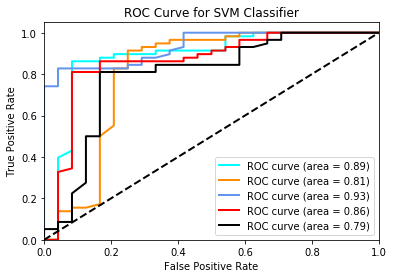

In [41]:
# Plot the ROC curve for SVM
from itertools import cycle

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'r', 'k'])
plt.figure()
lw = 2

for n , color in zip(range(m_SSS), colors):
    plt.plot(fpr[n], tpr[n], color=color, lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[n])
    
plt.plot([0, 1], [0, 1], color='k', lw=lw, linestyle='--')   
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Classifier')
plt.legend(loc="lower right")
plt.show()

In [42]:
area = 0
for i in roc_auc:
    area += roc_auc[i]
area / (i + 1)

0.8568247126436782

### 4 Group KFold

In [43]:
#How many rows
(finalJoined.shape[0])

407

In [44]:
# How many subjects
finalJoined.index.unique()

Int64Index([10362, 10405, 10496, 10606, 10662, 10663, 10672, 10765, 10775,
            10874,
            ...
            91097, 91249, 91305, 91548, 91837, 92138, 92490, 92516, 92560,
            92834],
           dtype='int64', length=129)

Since the number of unique subjects is less than the total number of rows, some subjects appear more than once. This could produce leaks. Need to find a way to keep multiple instances of the same subject in the same train or test

Also, there are more PD cases than non in the sample, so using stratification on the splits will help

In [45]:
from sklearn.model_selection import GroupKFold

groups = np.array(finalJoined.index)
group_kfold = GroupKFold(n_splits=5)


# Choose C values to test and create classifiers
clfs_GKF = []
#C_vals_GKF = [0.55, 1, 7, 8, 9, 10, 11, 12]
C_vals_GKF = [0.5, 0.55, 0.6, 1, 7, 8, 9, 10]

for p in C_vals_GKF:
    clfs_GKF.append(SVC(C=p))
    
#k_GKF = 0;

# Do GKF cross validation on each classifier
for temp_clf, j in zip(clfs_GKF, range(len(C_vals_GKF))):
    print("C = ", np.asarray(C_vals_GKF[j]))
    
    Fscores4 = []
    Ascores4 = []
    Mscores4 = []
   
    for train_index, test_index in group_kfold.split(X, y, groups):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        temp_clf.fit(X_train, y_train)
        
        Ascores4.append(temp_clf.score(X_test, y_test))
        #print("Classifier Accuracy for split number ", k_GKF, "\n", temp_clf.score(X_test, y_test), "\n")
    
        Fscores4.append(f1_score(y_test, temp_clf.predict(X_test)))
        #print("Classifier F score for split number ", k_GKF, "\n", f1_score(y_test,temp_clf.predict(X_test)), "\n")
    
        Mscores4.append(matthews_corrcoef(y_test, temp_clf.predict(X_test)))
        #print("Classifier MCC score for split number ", k_GKF, "\n", 
        #matthews_corrcoef(y_test,temp_clf.predict(X_test)), "\n")
        #k_GKF += 1
      
     
    print("Accuracy [0, 1]:  Mean = %0.2f STD = %0.2f" % (np.mean(Ascores4), np.std(Ascores4, ddof=1)))
    print("F score [0,1]:    Mean = %0.2f STD = %0.2f" % (np.mean(Fscores4), np.std(Fscores4, ddof=1)))   
    print("MCC score [-1,1]: Mean = %0.2f STD = %0.2f" % (np.mean(Mscores4), np.std(Mscores4, ddof=1)))
    print()

C =  0.5
Accuracy [0, 1]:  Mean = 0.71 STD = 0.21
F score [0,1]:    Mean = 0.79 STD = 0.19
MCC score [-1,1]: Mean = 0.33 STD = 0.37

C =  0.55
Accuracy [0, 1]:  Mean = 0.71 STD = 0.21
F score [0,1]:    Mean = 0.79 STD = 0.19
MCC score [-1,1]: Mean = 0.33 STD = 0.37

C =  0.6
Accuracy [0, 1]:  Mean = 0.71 STD = 0.21
F score [0,1]:    Mean = 0.79 STD = 0.19
MCC score [-1,1]: Mean = 0.33 STD = 0.37

C =  1
Accuracy [0, 1]:  Mean = 0.68 STD = 0.19
F score [0,1]:    Mean = 0.76 STD = 0.18
MCC score [-1,1]: Mean = 0.28 STD = 0.31

C =  7
Accuracy [0, 1]:  Mean = 0.62 STD = 0.13
F score [0,1]:    Mean = 0.70 STD = 0.12
MCC score [-1,1]: Mean = 0.20 STD = 0.25

C =  8
Accuracy [0, 1]:  Mean = 0.62 STD = 0.13
F score [0,1]:    Mean = 0.70 STD = 0.12
MCC score [-1,1]: Mean = 0.21 STD = 0.25

C =  9
Accuracy [0, 1]:  Mean = 0.60 STD = 0.15
F score [0,1]:    Mean = 0.67 STD = 0.15
MCC score [-1,1]: Mean = 0.19 STD = 0.25

C =  10
Accuracy [0, 1]:  Mean = 0.59 STD = 0.16
F score [0,1]:    Mean = 0.

Optimal C = 0.55

### 5 Group Shuffle Split

In [59]:
from sklearn.model_selection import GroupShuffleSplit

groupsSS = np.array(finalJoined.index)
gss = GroupShuffleSplit(n_splits = 5, test_size=0.2, random_state=0)

In [60]:
# Choose C values to test and create classifiers
clfs_GSS = []
C_vals_GSS = [0.4, 0.45, 0.5, 0.51, 0.52, 0.53, 0.55, 9]

for i in C_vals_GSS:
    clfs_GSS.append(SVC(C=i))
    
#k_GSS = 0

# Do SSS cross validation on each classifier
for temp_clf, t in zip(clfs_GSS, range(len(C_vals_GSS))):
    print("C = ", np.asarray(C_vals_GSS[t]))
    
    Fscores5 = []
    Ascores5 = []
    Mscores5 = []
   
    
    for train_index, test_index in gss.split(X, y, groupsSS):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        temp_clf.fit(X_train, y_train)
        
        Ascores5.append(temp_clf.score(X_test, y_test))
        #print("Classifier Accuracy for split number ", k_GSS, "\n", temp_clf.score(X_test, y_test), "\n")
    
        Fscores5.append(f1_score(y_test, temp_clf.predict(X_test)))
        #print("Classifier F score for split number ", k_GSS, "\n", f1_score(y_test,temp_clf.predict(X_test)), "\n")
    
        Mscores5.append(matthews_corrcoef(y_test, temp_clf.predict(X_test)))
        #print("Classifier MCC score for split number ", k_GSS, "\n", 
        #matthews_corrcoef(y_test,temp_clf.predict(X_test)), "\n")
        #k_GSS += 1
      
    print("Accuracy [0, 1]:  Mean = %0.2f STD = %0.2f" % (np.mean(Ascores5), np.std(Ascores5, ddof=1)))
    print("F score [0,1]:    Mean = %0.2f STD = %0.2f" % (np.mean(Fscores5), np.std(Fscores5, ddof=1)))
    print("MCC score [-1,1]: Mean = %0.2f STD = %0.2f" % (np.mean(Mscores5), np.std(Mscores5, ddof=1)))
    print()

C =  0.4
Accuracy [0, 1]:  Mean = 0.76 STD = 0.06
F score [0,1]:    Mean = 0.85 STD = 0.05
MCC score [-1,1]: Mean = 0.15 STD = 0.18

C =  0.45
Accuracy [0, 1]:  Mean = 0.77 STD = 0.06
F score [0,1]:    Mean = 0.86 STD = 0.04
MCC score [-1,1]: Mean = 0.20 STD = 0.23

C =  0.5
Accuracy [0, 1]:  Mean = 0.74 STD = 0.09
F score [0,1]:    Mean = 0.84 STD = 0.06
MCC score [-1,1]: Mean = 0.17 STD = 0.25

C =  0.51
Accuracy [0, 1]:  Mean = 0.74 STD = 0.09
F score [0,1]:    Mean = 0.84 STD = 0.06
MCC score [-1,1]: Mean = 0.17 STD = 0.25

C =  0.52
Accuracy [0, 1]:  Mean = 0.71 STD = 0.10
F score [0,1]:    Mean = 0.82 STD = 0.06
MCC score [-1,1]: Mean = 0.12 STD = 0.28

C =  0.53
Accuracy [0, 1]:  Mean = 0.72 STD = 0.09
F score [0,1]:    Mean = 0.82 STD = 0.06
MCC score [-1,1]: Mean = 0.13 STD = 0.27

C =  0.55
Accuracy [0, 1]:  Mean = 0.72 STD = 0.09
F score [0,1]:    Mean = 0.82 STD = 0.06
MCC score [-1,1]: Mean = 0.13 STD = 0.27

C =  9
Accuracy [0, 1]:  Mean = 0.49 STD = 0.11
F score [0,1]:  

Optimal C = 0.45

### 6 ROC Curve using GSS

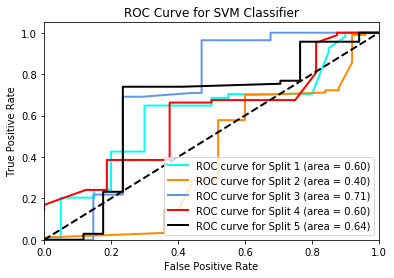

In [61]:
clf_ROC_GSS = SVC(C=.45)

from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

m_GSS = 0
for train_index, test_index in gss.split(X, y, groupsSS):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_ROC_GSS.fit(X_train, y_train)
    y_score = clf_ROC_GSS.decision_function(X_test)
    yTrue = [int(float(s)) for s in y_test]
    fpr[m_GSS], tpr[m_GSS], _ = roc_curve(yTrue, y_score)
    roc_auc[m_GSS] = auc(fpr[m_GSS], tpr[m_GSS])
    m_GSS += 1

# Plot the ROC curve for SVM

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'r', 'k'])
plt.figure()
lw = 2

for n, color in zip(range(m_GSS), colors):
    plt.plot(fpr[n], tpr[n], color=color, lw=lw, label='ROC curve for Split %d (area = %0.2f)' % (n+1, roc_auc[n]))
    
plt.plot([0, 1], [0, 1], color='k', lw=lw, linestyle='--')   
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Classifier')
plt.legend(loc="lower right")
plt.show()

## 7 ROC Curve 

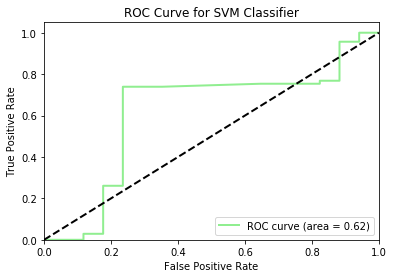

In [50]:
clf_ROC = SVC(C=.55)
clf_ROC.fit(X_train,y_train)

fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = clf_ROC.decision_function(X_test)
yTrue = [int(float(s)) for s in y_test]
fpr, tpr, _ = roc_curve(yTrue, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve for SVM
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='lightgreen',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='k', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Classifier')
plt.legend(loc="lower right")
plt.show()

# Linear Discriminant Analysis

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

gss_LDA = GroupShuffleSplit(n_splits = 1, test_size=0.2)
clf_LDA = LinearDiscriminantAnalysis()
for train_index, test_index in gss_LDA.split(X, y, groupsSS):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_LDA.fit(X_train, y_train)


In [52]:
# Score should be better than 0.7076167076167076
# Before data split 0.8943488943488943
# Fisher Price split 0.8529411764705882
clf_LDA.score(X_test,y_test)

0.73

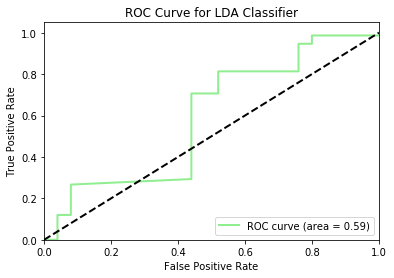

In [53]:
# Find the ROC Curve for LDA
# Before data split Area= 0.90
# Fisher Price split .83

fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = clf_LDA.decision_function(X_test)
yTrue = [int(float(s)) for s in y_test]
fpr, tpr, _ = roc_curve(yTrue, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve for LDA
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='lightgreen',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='k', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LDA Classifier')
plt.legend(loc="lower right")
plt.show()

# Quadratic Discriminant Analysis

In [54]:
# Try Quadratic Discriminant Analysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

gss_QDA = GroupShuffleSplit(n_splits = 1, test_size=0.2, random_state = 0)
clf_QDA = QuadraticDiscriminantAnalysis()
for train_index, test_index in gss_QDA.split(X, y, groupsSS):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_QDA.fit(X_train, y_train)

In [55]:
# Score of the QDA
# Before splitting data 0.9287469287469288
# Fisher Price split 0.8627450980392157

clf_QDA.score(X_test,y_test)

0.28378378378378377

In [56]:
# Find the ROC curve for QDA
# Before splitting data Area= .99
# Fisher Price split .91

fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = clf_QDA.decision_function(X_test)
yTrue = [int(float(s)) for s in y_test]
fpr, tpr, _ = roc_curve(yTrue, y_score)
roc_auc = auc(fpr, tpr)

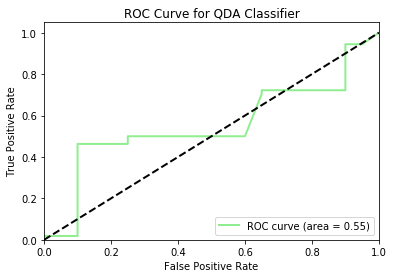

In [57]:
# Plot the ROC Curve for QDA

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='lightgreen',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='k', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for QDA Classifier')
plt.legend(loc="lower right")
plt.show()